In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from math import sin

import pymg3d as pg
import smoothers
import THeatgenerator

In [38]:
def plot(surface, shape=None, title='surface'):
    surface = surface if not shape else surface.reshape(shape)
    xs, ys = np.indices(surface.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xs, ys, surface)
    plt.title(title)

In [39]:
A = THeatgenerator.heat_matrix(17, 0.5, 0.1, 0.1, 2)

print(A[:10,:10])
print(np.linalg.cholesky(A))

b = np.zeros([17, 17])
for x in range(b.shape[0]):
    for y in range(b.shape[1]):
        b[(x, y)] = 100 + (x + y) + 5*sin(50*(x + y) * np.pi/180.0) 


[[ 21.   5.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  5.  21.   5.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   5.  21.   5.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   5.  21.   5.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   5.  21.   5.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   5.  21.   5.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   5.  21.   5.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   5.  21.   5.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   5.  21.   5.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   5.  21.]]
[[ 4.58257569  0.          0.         ...,  0.          0.          0.        ]
 [ 1.09108945  4.45078912  0.         ...,  0.          0.          0.        ]
 [ 0.          1.12339629  4.44274473 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  4.2039335   0.          0.        ]
 [ 0.          0.          0.         ...,  1.32110079  4.20784009  0.        ]
 [ 0.          0.          0.         ..., -0.04062593  1.3040

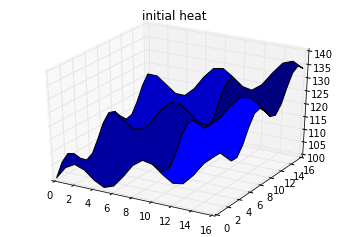

In [40]:
plot(b, title="initial heat")

In [41]:
a=b.shape
#print(b)
b1=b[:]
bf = b.flatten()
br = bf.reshape(a)

print((br==b1).all())
#print(b.flatten())
#print(b.reshape(a))


True


(289, 289) (17, 17) (289,)


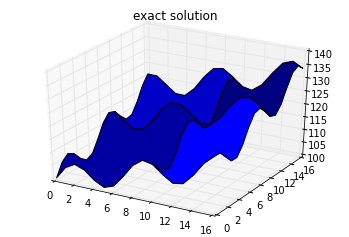

In [42]:
exact_solver = np.linalg.solve
exact_x = exact_solver(np.eye(289), b.flatten())
print A.shape, b.shape, exact_x.shape

plot(exact_x, b.shape, "exact solution")

In [43]:
solver = pg.MultigridSolver(pg.interpolate, pg.restrict, smoothers.chebyshev, 9)

# solver = smoothers.gauss_siedel

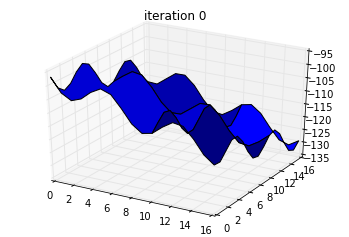

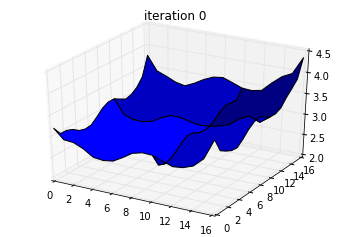

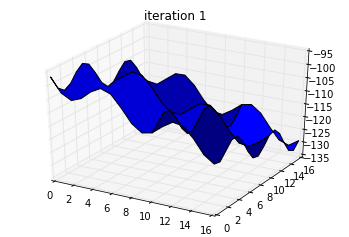

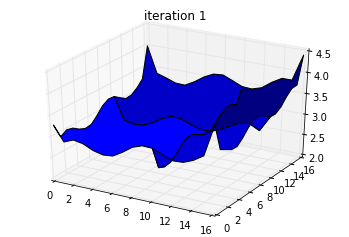

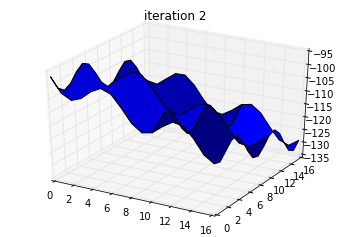

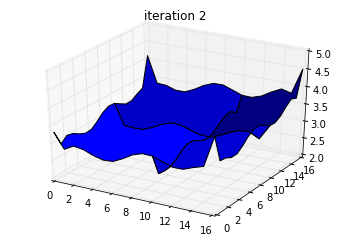

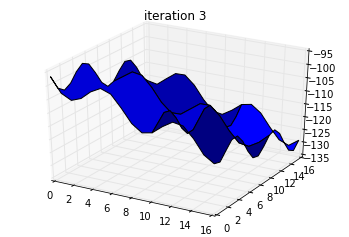

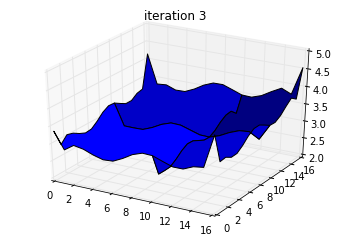

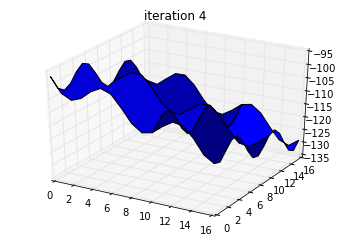

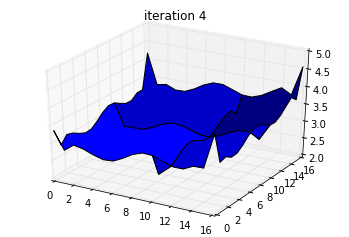

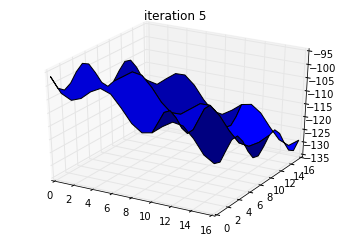

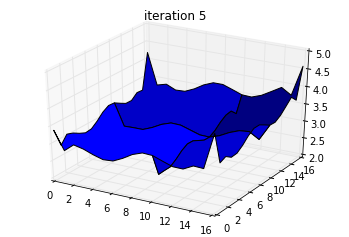

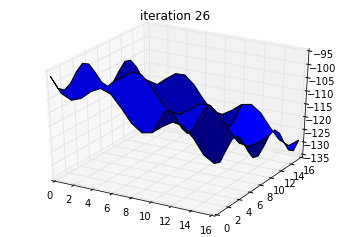

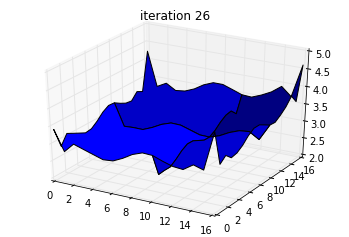

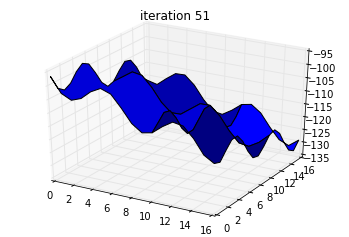

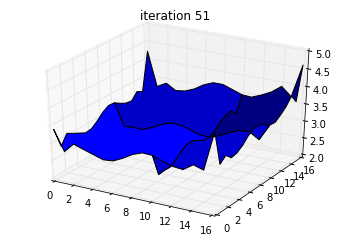

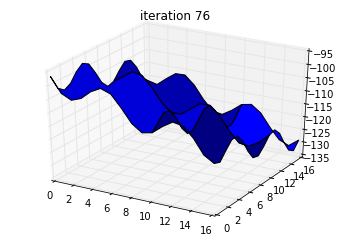

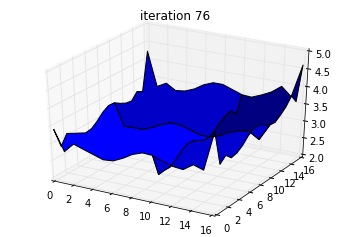

In [44]:
#V CYCLE
x = np.zeros_like(b)

for trial in range(100):
    xv = solver(A, b, x, "V")
    
    
    if trial % 25 == 1 or trial < 6:
        residualv = xv - exact_x.reshape(b.shape)

        plot(residualv, b.shape, "iteration {}".format(trial))
        plot(xv, b.shape, "iteration {}".format(trial))
    x=xv


###FCycle

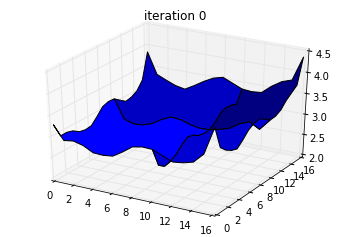

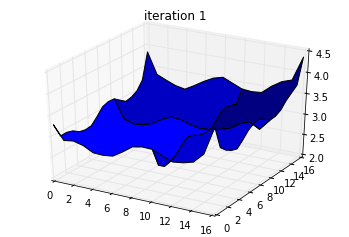

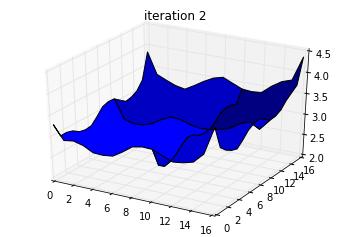

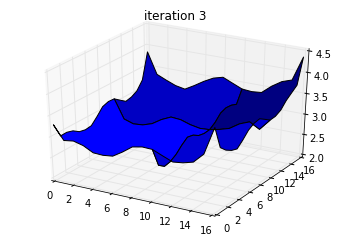

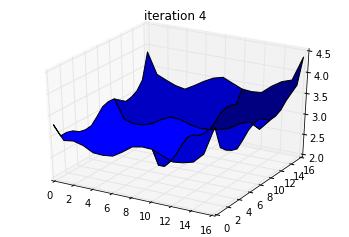

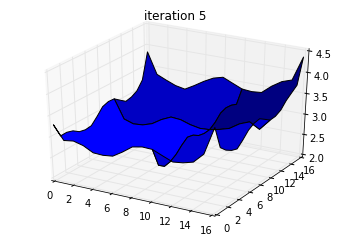

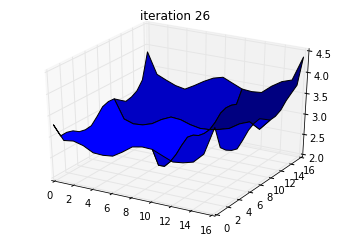

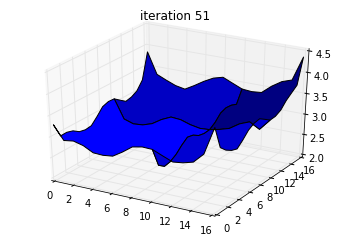

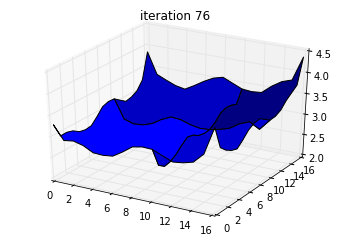

In [45]:
#F cycle
x = np.zeros_like(b)

for trial in range(100):
    xf = solver(A, b, x, "F")
    
    if trial % 25 == 1 or trial < 6:
        residualf = xf - exact_x.reshape(b.shape)
        plot(xf, b.shape, "iteration {}".format(trial))
    x=xf


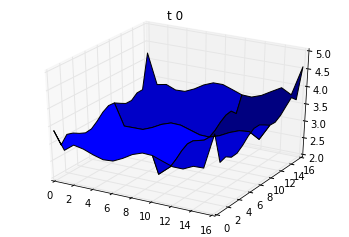

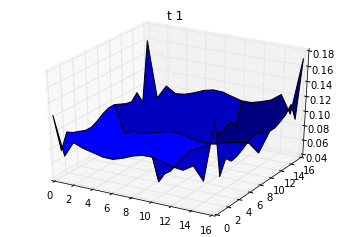

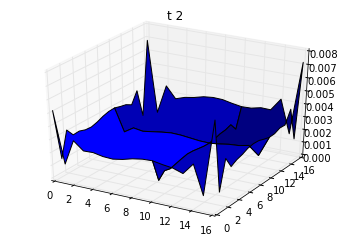

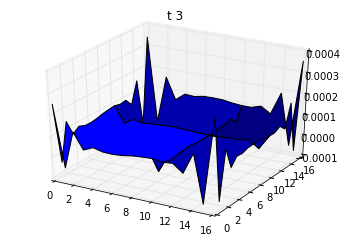

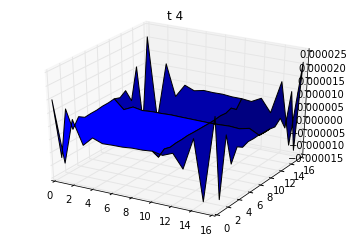

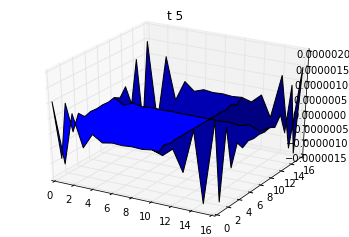

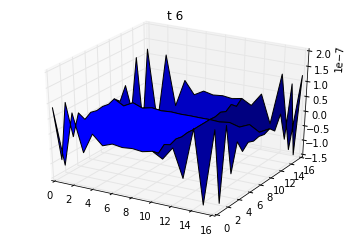

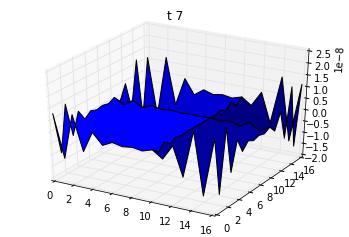

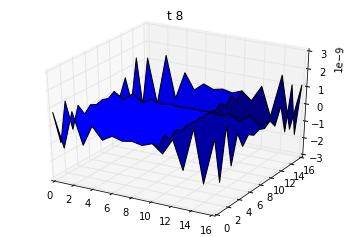

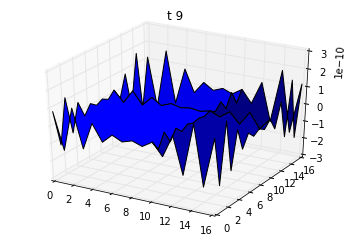

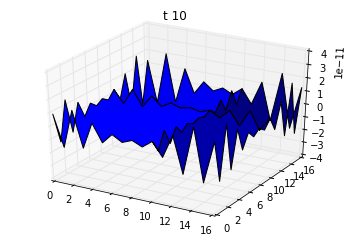

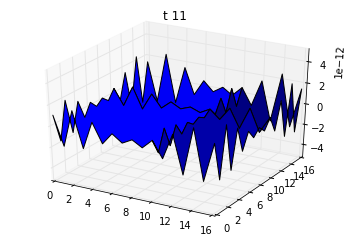

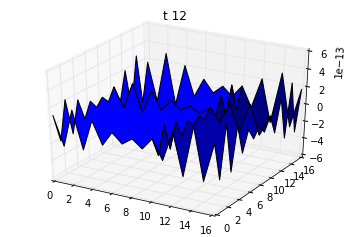

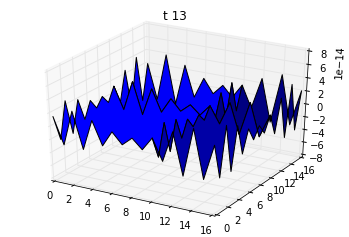

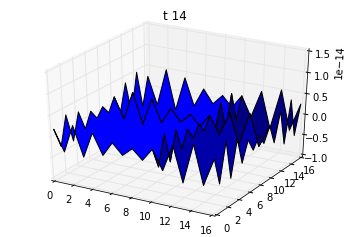

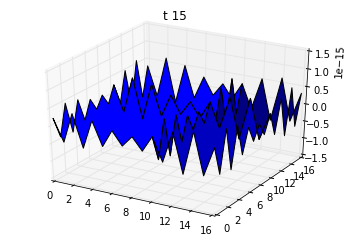

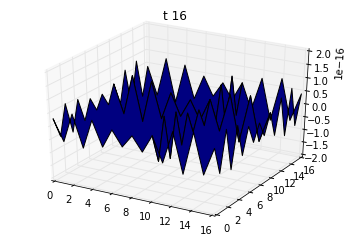

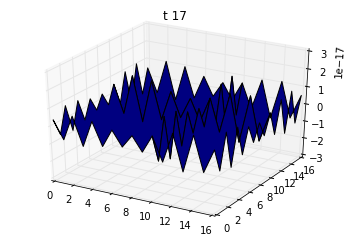

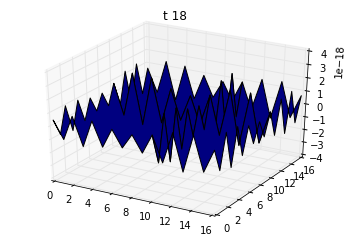

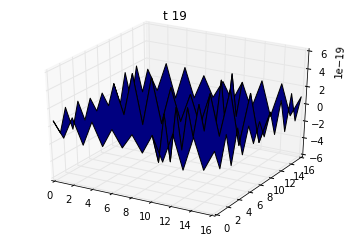

In [46]:
#V CYCLE multiple timesteps


for time_step in range(0, 20):
    x = np.zeros_like(b)
    for trial in range(5):
        xv = solver(A, b, x, "V")


        if trial % 25 == 1 or trial < 6:
            residualv = xv - exact_x.reshape(b.shape)


        x=xv
    #plot(residualv, b.shape, "iteration {}".format(trial))
    plot(xv, b.shape, "t {}".format(time_step))
    b=x 